Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='59tNyQac_kngmhDMzmDKarMP1525tUGdaCs9qj5XWpKP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carresalepriceprediction-donotdelete-pr-dwutvbxozjdhwc'
object_key = 'car data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
car_dataset = df_data_1


# New Section

In [3]:
 # checking the number of rows and columns
car_dataset.shape

(302, 9)

In [4]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       302 non-null    object 
 1   Year           302 non-null    int64  
 2   Selling_Price  302 non-null    float64
 3   Present_Price  302 non-null    float64
 4   Kms_Driven     302 non-null    int64  
 5   Fuel_Type      302 non-null    object 
 6   Seller_Type    302 non-null    object 
 7   Transmission   302 non-null    object 
 8   Owner          302 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.4+ KB


In [5]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    240
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        196
Individual    106
Name: Seller_Type, dtype: int64
Manual       262
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [7]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,hundai \neion,2015,7.50,3.50,25000,0,0,0,1
1,ritz,2014,3.35,5.59,27000,0,0,0,0
2,sx4,2013,4.75,9.54,43000,1,0,0,0
3,ciaz,2017,7.25,9.85,6900,0,0,0,0
4,wagon r,2011,2.85,4.15,5200,0,0,0,0


Splitting the data and Target

In [9]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [10]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2015           3.50       25000          0            0             0   
1    2014           5.59       27000          0            0             0   
2    2013           9.54       43000          1            0             0   
3    2017           9.85        6900          0            0             0   
4    2011           4.15        5200          0            0             0   
..    ...            ...         ...        ...          ...           ...   
297  2016          11.60       33988          1            0             0   
298  2015           5.90       60000          0            0             0   
299  2009          11.00       87934          0            0             0   
300  2017          12.50        9000          1            0             0   
301  2016           5.90        5464          0            0             0   

     Owner  
0        1  
1        0  
2        0  
3        0 

In [11]:
print(Y)

0       7.50
1       3.35
2       4.75
3       7.25
4       2.85
       ...  
297     9.50
298     4.00
299     3.35
300    11.50
301     5.30
Name: Selling_Price, Length: 302, dtype: float64


Splitting Training and Test data

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [13]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
140,2015,0.95,16600,0,1,0,0
250,2016,7.60,17000,0,0,0,0
256,2012,5.35,53675,0,0,0,0
285,2013,5.90,9800,0,0,0,0
249,2013,4.60,30000,0,0,0,0
...,...,...,...,...,...,...,...
75,2014,8.93,83000,1,0,0,0
22,2017,5.71,2400,0,0,0,0
72,2011,12.48,45000,1,0,0,0
15,2009,7.21,77427,0,0,0,0


In [14]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [16]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8852062385425361


Visualize the actual prices and Predicted prices

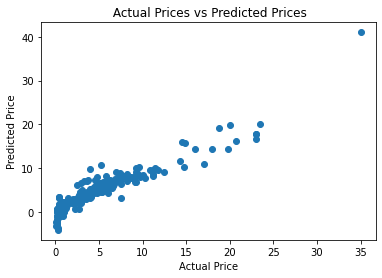

In [18]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [19]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [20]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared : ", error_score)

R squared :  0.7900204528354198


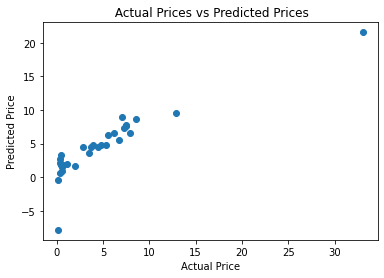

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [22]:
# loading the linear regression model
lass_reg_model = Lasso()

In [23]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
140,2015,0.95,16600,0,1,0,0
250,2016,7.60,17000,0,0,0,0
256,2012,5.35,53675,0,0,0,0
285,2013,5.90,9800,0,0,0,0
249,2013,4.60,30000,0,0,0,0
...,...,...,...,...,...,...,...
75,2014,8.93,83000,1,0,0,0
22,2017,5.71,2400,0,0,0,0
72,2011,12.48,45000,1,0,0,0
15,2009,7.21,77427,0,0,0,0


In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [25]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8461428644034024


Visualize the actual prices and Predicted prices

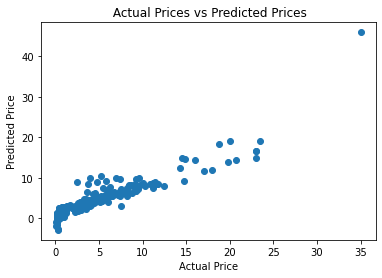

In [27]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [28]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7387176172760477


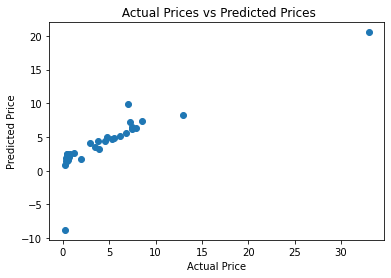

In [30]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
!pip install ibm_watson_machine_learning

In [32]:

from ibm_watson_machine_learning import APIClient
import json

In [33]:
wml_credentials = {
    "apikey":"UaxQIMIZLrhXqHi42vY8HtJXS33XbxTucmHrMDS5pv9D",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [34]:
wml_client = APIClient(wml_credentials)


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
13b6326e-512a-48b9-8a5b-d4c6ab63eca8  Model  2022-11-19T14:51:18.610Z
3bb43119-5743-4bab-b3bc-1c0a1aa71b7e  model  2022-11-19T14:39:08.307Z
------------------------------------  -----  ------------------------


In [46]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
6f4104ba-447e-4c1e-a754-9e20ecc9d0f4  final  2022-11-25T15:03:29.046Z
13b6326e-512a-48b9-8a5b-d4c6ab63eca8  Model  2022-11-19T14:51:18.610Z
3bb43119-5743-4bab-b3bc-1c0a1aa71b7e  model  2022-11-19T14:39:08.307Z
------------------------------------  -----  ------------------------


In [47]:

SPACE_ID= "6f4104ba-447e-4c1e-a754-9e20ecc9d0f4"

In [48]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [37]:
MODEL_NAME = 'LR'
DEPLOYMENT_NAME = 'LR_prediction'
DEMO_MODEL = lin_reg_model

In [50]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [51]:
import sklearn
sklearn.__version__

'1.0.2'

In [52]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [53]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=Y_train
)

In [54]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Selling_Price',
  'schemas': {'input': [{'fields': [{'name': 'Year', 'type': 'int64'},
      {'name': 'Present_Price', 'type': 'float64'},
      {'name': 'Kms_Driven', 'type': 'int64'},
      {'name': 'Fuel_Type', 'type': 'int64'},
      {'name': 'Seller_Type', 'type': 'int64'},
      {'name': 'Transmission', 'type': 'int64'},
      {'name': 'Owner', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-25T15:05:08.038Z',
  'id': '231acd94-5f0a-4c54-be9d-6b728533c415',
  'modified_at': '2022-11-25T15:05:10.775Z',
  'name': 'LR',
  'owner': 'IBMid-666002NY14',
  'resource_key': 'a20baaf8-d642-450d-ae31-f6c58b1dbf86',
  'space_id': '6f4104ba-447e-4c1e-a754-9e20ecc9d0f4'},
 'system': {'warnings': []}}

In [55]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'231acd94-5f0a-4c54-be9d-6b728533c415'

In [56]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [57]:
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '231acd94-5f0a-4c54-be9d-6b728533c415' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='7db13257-736d-48b4-92b2-172537e3a559'
------------------------------------------------------------------------------------------------


